# Code Documentation of ImageScraper500

## Description of the Idea

With the ImageScraper500 I have created it is possible to scrape images from the website https://www.500px.com/. This website is a platform for photographers to share their work with other photographers. On this webpage you can find a lot of high quality images in different image classes provided by each photographer. As I am a user and member of this website and share images from time to time, I wanted to create a scraper to scrape images with their respective classes from the website. Furthermore the idea behind the scraping and their image classes is to create an image classification model for photography, which could potentially used for different websites to classify the uploaded images. This could be done in a subsequent small project in Deep Learning for instance.

## Getting Started:

First of all you have to install a webdriver, which is compatible with selenium. You can check this on the repective webpage of selenium: https://www.selenium.dev/downloads/

For example you can get the webdriver for Chrome here: https://chromedriver.chromium.org/downloads 

This part describes in which ways the imagescraper can be used to achieve your scraping goals. There are actually two different ways to scrape from the webpage:

1. ImageCrawler500: Calll the class and its crawl method to scrape a certain amount of different picture from each image class.
2. ImageStream500: Call the class and the stream method with all depending parameters to do an image streaming, which one could also call a mirror, if you put in a close density of stream times as class attribute.

### Method 1: ImageCrawler500

Crawl images from the website with a fixed amount of images per class. It is possible to make use of the script `crawler_exe.py`. Parameters with this script need to be adjusted as well before the script is started.

#### Usage Procedure with class import:
- Initiate class with the relevant paramters:
    - path to your selenium webdriver. My Webdrier was chromedriver given in the path.
    - Then chose the amount of images you want from each class.
    - then choose popularity ranking, which are listed on the website.
- call method crawl() to start the process.
- After all image sources where extracted the picture will be stored in the folder structure with the respective image class.

In [1]:
# Import class ImageCrawler500
from imagescraper500 import ImageCrawler500
from selenium import webdriver

In [2]:
# Initiate class
crawler = ImageCrawler500(webdriver=webdriver.Chrome('./src/chromedriver.exe'),
                          amount_per_class=2, 
                          popularity_ranking='popular')

*****  ImageCrawler: amount_per_class = 2 / popularity_ranking = popular  *****


In [3]:
# Start process
crawler.crawl()

| Extracting: 2 Images of family (1/28)
| Extracting: 2 Images of transportation (2/28)
| Extracting: 2 Images of aerial (3/28)
| Extracting: 2 Images of concert (4/28)
| Extracting: 2 Images of sport (5/28)
| Extracting: 2 Images of street (6/28)
| Extracting: 2 Images of travel (7/28)
| Extracting: 2 Images of film (8/28)
| Extracting: 2 Images of fashion (9/28)
| Extracting: 2 Images of urban exploration (10/28)
| Extracting: 2 Images of wedding (11/28)
| Extracting: 2 Images of abstract (12/28)
| Extracting: 2 Images of performing arts (13/28)
| Extracting: 2 Images of landscapes (14/28)
| Extracting: 2 Images of underwater (15/28)
| Extracting: 2 Images of food (16/28)
| Extracting: 2 Images of commercial (17/28)
| Extracting: 2 Images of night (18/28)
| Extracting: 2 Images of celebrities (19/28)
| Extracting: 2 Images of city and architecture (20/28)
| Extracting: 2 Images of journalism (21/28)
| Extracting: 2 Images of fine art (22/28)
| Extracting: 2 Images of still life (23/2

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:25<00:00,  1.08it/s]


In [4]:
img_count_in_folder = crawler.count_collected_images(print_count=True)

Counted 525 Collected Images.


### Method 2: ImageStream500

The second method is to make an image stream of a particular image class. The stream makes it possible to get all new images within a class or to scrape an amount of images at a defined time. Therefore two scripts were created in the folder run. `stream_exe.py`, `stream_exe_no_scheduler.py`

`stream_exe.py` is meant to run with the program scheduler used in windows for example. The other script runs by itself at the times defined within the script.

#### Usage Procedure with class import:
- Initiate class with the relevant paramters:
    - Initiate a selenium webdriver object
    - then choose popularity ranking, which are listed on the website.
    - Define an iteration_sampling_rate: how many images it should look up when the page was refreshed.
    - Chose a batchsize: After how much collected images the download should start.
    - Streamtime: how long this process should take place.
    - Image Folder path defines the path of the image folder (Where to save the images)
- call method stream() to start the process.
- After all image sources where extracted the picture will be stored in the folder structure with the respective image class.


In [5]:
from imagescraper500 import ImageStream500
from selenium import webdriver

In [6]:
streamer = ImageStream500(webdriver=webdriver.Chrome('./src/chromedriver.exe'), 
                          popularity='fresh', iter_sampling_rate=10, batchsize=15, 
                          stream_time=2, image_folder_path='./images'
                         )

*****  ImageStream: popularity = fresh / iter_sampling_rate = 10 / batchsize = 15 / stream_time = 2  *****


In [7]:
streamer.stream()

| Extracted 8 images in total.
| Extracted 9 images in total.
| Extracted 12 images in total.
| Extracted 13 images in total.
| Extracted 16 images in total.
| Starting download of all images ...


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:08<00:00,  1.12s/it]


| Saved Image Batch to folder.
| Stream Time of 2 min over.


In [8]:
img_count_in_folder = crawler.count_collected_images(print_count=True)

Counted 541 Collected Images.


### Further Usage:

I created run files in python to start this process at a certain time each day. All the run files can be found under the run directory: `./run`. For the image streaming I created two different files. One file should work with a scheduler of the operating system (Task Scheduler) and the other one works without scheduler. All parameters of the run files can be adjusted in the `config.json`within this folder.

## Preview some Downloaded Images

Here I will show some previously downloaded sample photos. Additionally, I will show the respective class of the images as image title.

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

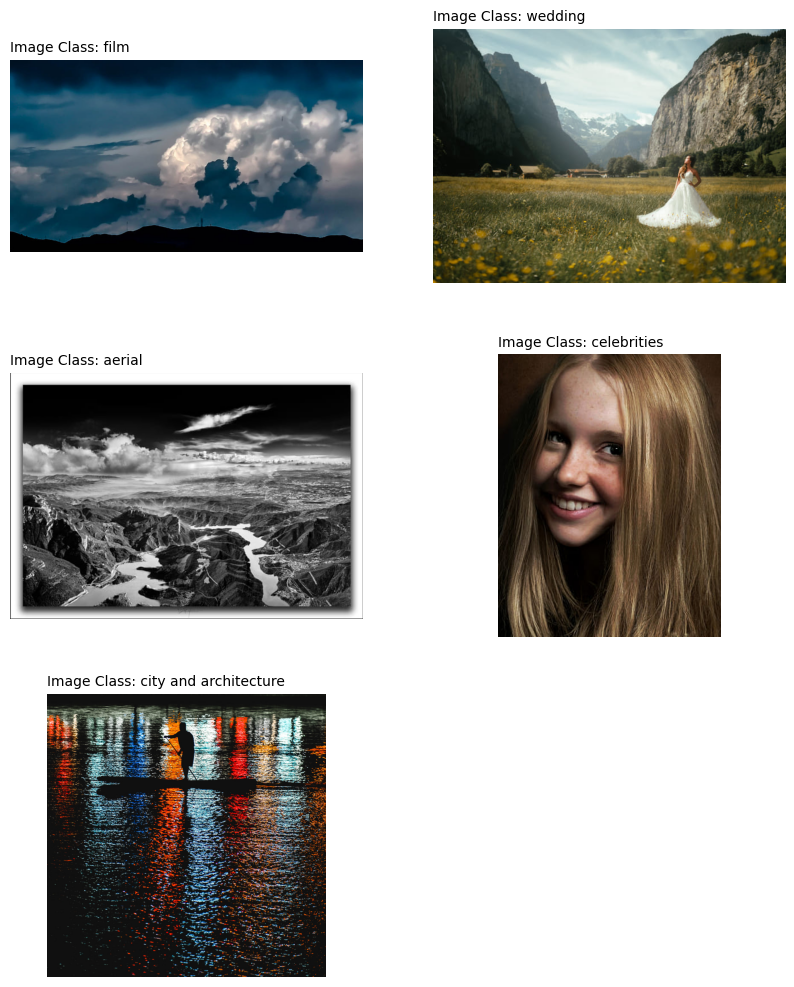

In [10]:
def show_random_images(count=10):
    fig = plt.subplots(figsize=(10, count/2*5))
    ncols, nrows = 2, int(count/2)+1
    
    for i in range(1, count+1):
        plt.subplot(nrows, ncols, i)
        image_dirs = os.listdir('./images')
        random_dir = random.choice(image_dirs)
        images = os.listdir(f'./images/{random_dir}')
        random_image = random.choice(images)

        img = Image.open(f'./images/{random_dir}/{random_image}')
        plt.title(f'Image Class: {random_dir}', loc='left', fontsize=10)
        plt.axis('off')
        plt.imshow(img)
        
    plt.show()

show_random_images(count=5)

## Relevance

I think I can use this scraper for the module Deep Learning (dpl), in which I probably need a lot of higher quality images, which this website is dedicated for. With the scraper I hope that I can scrape enough images to built a model in advance to classify what kind of image (image class) the image belongs to . I came accross this idea while I was building an instagram bot which fakes activity and engagement with other users on INstagram. There are many bots out there which "like" everything and not specific images of a certain class. My idea was to build a model which can classify images according to their classes and then just "like" landscape photos for example.

When I was building the Scraper it was challenging to make it as optimal as possible, because Selenium is actually very slow (like a real user). I recognized that there is a module within selenium to make the webdriver wait until the content was loaded. I tried to put this in almost each new operation of my scraper.